In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#read origin img 
image = cv2.imread('lena.bmp',0)
rows,cols = image.shape
img = np.asarray(image)
print(rows,cols)

512 512


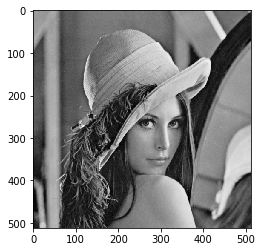

In [3]:
X = img
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest',cmap = 'gray')
numrows, numcols = X.shape
plt.show()

In [4]:
#build SNR calculate dict
SNR_dic = {}

def SNR(o_img,o_n_img):
    row, col = o_img.shape
    SUM = 0
    
    o_n_img.astype(np.float64)
    n_img = np.divide(o_n_img, 255)

    o_img.astype(np.float64)
    img = np.divide(o_img, 255)

    for i in range (row):
        for j in range (col):
            SUM += img[i][j]
    mu = SUM / (row * col)
    #print('mu',mu)
    
    SUM = 0
    for i in range (row):
        for j in range (col):
            SUM += (img[i][j]-mu)**2
   
    sigma = SUM / (row * col)
    #print('sigma',sigma)
    
    SUM = 0
    for i in range (row):
        for j in range (col):
            SUM += (n_img[i][j] - img[i][j])
    mu_n = SUM / (row *col)
    #print('mu_n',mu_n)
    
    SUM = 0
    for i in range (row):
        for j in range (col):
            SUM += (n_img[i][j] - img[i][j] - mu_n)**2
    sigma_n = SUM / (row *col)
    #print('sigma_n',sigma_n)

    SNR = 10 * ( math.log10(sigma) - math.log10(sigma_n))
    #print('log sigma',math.log10(sigma))
    #print('log sigma_n',math.log10(sigma_n))
    
    print(SNR)
    return SNR


In [5]:
# Gaussian noise - amplitude 10 and 30
gau_10 = np.full((rows,cols),0)
gau_30 = np.full((rows,cols),0)

#definition of normal distribution
mu, sigma = 0, 1
s1 = np.random.normal(mu, sigma, (rows,cols))

for i in range (rows):
    for j in range (cols):
        tmp = img[i][j] + 10 * s1[i][j]
        if tmp > 255:
            gau_10[i][j] = 255
        elif tmp < 0:
            gau_10[i][j] = 0
        else:
            gau_10[i][j] = tmp

for i in range (rows):
    for j in range (cols):
        tmp = img[i][j] + 30 * s1[i][j]
        if tmp > 255:
            gau_30[i][j] = 255
        elif tmp < 0:
            gau_30[i][j] = 0
        else:
            gau_30[i][j] = tmp

In [6]:
SNR_dic['gau_10'] = SNR(img,gau_10)
SNR_dic['gau_30'] = SNR(img,gau_30)
cv2.imwrite('gau_10.png', gau_10)
cv2.imwrite('gau_30.png', gau_30)

13.616226872682935
4.189869759325877


True

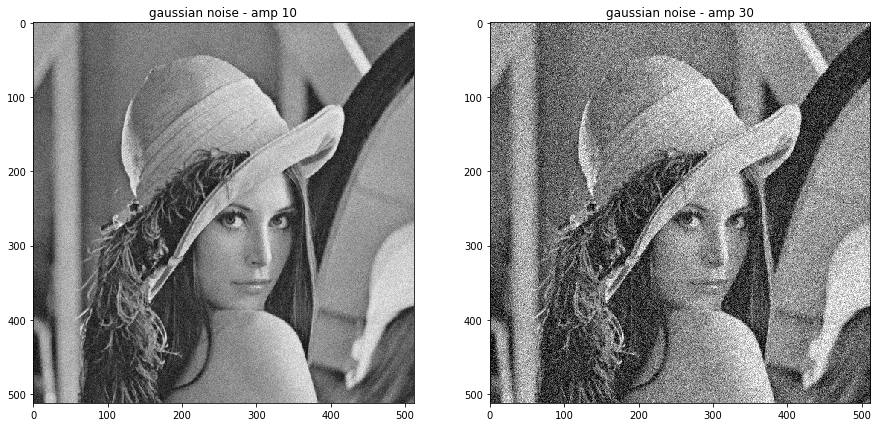

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(15,30))
axs[0].imshow(gau_10, interpolation='nearest',cmap = 'gray')
axs[0].set_title('gaussian noise - amp 10')
axs[1].imshow(gau_30, interpolation='nearest',cmap = 'gray')
axs[1].set_title('gaussian noise - amp 30')
plt.show()

In [8]:
# Salt and pepper noise (probability 0.1 and 0.05)
sa_10 = np.full((rows,cols),0)
sa_05 = np.full((rows,cols),0)

s2 = np.random.uniform(0, 1, (rows,cols))

for i in range (rows):
    for j in range (cols):
        if s2[i][j] < 0.05:
            sa_05[i][j] = 0
        elif s2[i][j] > 0.95:
            sa_05[i][j] = 255
        else:
            sa_05[i][j] = img[i][j]
            

for i in range (rows):
    for j in range (cols):
        if s2[i][j] < 0.10:
            sa_10[i][j] = 0
        elif s2[i][j] > 0.90:
            sa_10[i][j] = 255
        else:
            sa_10[i][j] = img[i][j]

In [9]:
SNR_dic['sa_10'] = SNR(img,sa_10)
SNR_dic['sa_05'] = SNR(img,sa_05)
cv2.imwrite('sa_10.png', sa_10)
cv2.imwrite('sa_05.png', sa_05)

-2.0768713106322423
0.949505744098178


True

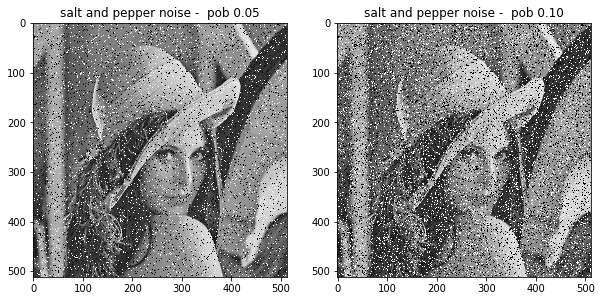

In [10]:
fig, axs = plt.subplots(1, 2,figsize=(10,20))
axs[0].imshow(sa_05, interpolation='nearest',cmap = 'gray')
axs[0].set_title('salt and pepper noise -  pob 0.05')
axs[1].imshow(sa_10, interpolation='nearest',cmap = 'gray')
axs[1].set_title('salt and pepper noise -  pob 0.10')

plt.show()

In [11]:
#deal with border issue before doing

gau_10 = cv2.copyMakeBorder(gau_10,2,2,2,2,cv2.BORDER_REFLECT)
gau_30 = cv2.copyMakeBorder(gau_30,2,2,2,2,cv2.BORDER_REFLECT)
sa_05 = cv2.copyMakeBorder(sa_05,2,2,2,2,cv2.BORDER_REFLECT)
sa_10 = cv2.copyMakeBorder(sa_10,2,2,2,2,cv2.BORDER_REFLECT)
n_rows, n_cols = sa_10.shape 
noise_img_lst = [gau_10, gau_30, sa_05, sa_10]
name_lst = ['gau_10', 'gau_30', 'sa_05', 'sa_10']
n_rows, n_cols

(516, 516)

### box filter

In [12]:
IBUF = np.full((n_cols),0)
tmp = np.full((512,512),0)

#### filter 3x3

In [13]:
for noise_img, name in zip(noise_img_lst, name_lst) :
   
    for j in range(n_cols):
        IBUF[j] = noise_img[1][j] + noise_img[2][j] + noise_img[3][j]  
        
    for i in range(2,n_rows-2):
        for j in range(2,n_cols-2):
            tmp[i-2][j-2] = IBUF[j-1] + IBUF[j] + IBUF[j+1]
            tmp[i-2][j-2] /= 9
    
        for j in range(n_cols):
            IBUF[j] = IBUF[j] - noise_img[i-1][j] + noise_img[i+2][j]
            
    cv2.imwrite(name+'_box33.png', tmp)
    SNR_dic[name+'_box33.png'] = SNR(img,tmp)

17.73978750735887
12.618310138269484
9.520882247230084
6.403572721062063


#### filter 5x5

In [15]:
for noise_img, name in zip(noise_img_lst, name_lst) :
   
    for j in range(n_cols):
        IBUF[j] = noise_img[0][j] + noise_img[1][j] + noise_img[2][j] + noise_img[3][j] + noise_img[4][j] 
        
    for i in range(2,n_rows-2):
        for j in range(2,n_cols-2):
            tmp[i-2][j-2] = IBUF[j-2] + IBUF[j-1] + IBUF[j] + IBUF[j+1] + IBUF[j+2]
            tmp[i-2][j-2] /= 25
        if i != n_rows-3: 
            for j in range(n_cols):
                IBUF[j] = IBUF[j] - noise_img[i-2][j] + noise_img[i+3][j]
            
    cv2.imwrite(name+'_box55.png', tmp)
    SNR_dic[name+'_box55.png'] = SNR(img,tmp)

14.851020990482162
13.290727631363929
11.222239985415822
8.606569383741235


### median filter

In [16]:
def median_filter(i, j, img, r):
    lst = []
    if r == 3:
        for a in (-1,0,1):
            for b in (-1,0,1):
                lst.append(img[i+a][j+b])
        lst.sort()
        return lst[4]
    elif r == 5:
        for a in (-2,-1,0,1,2):
            for b in (-2,-1,0,1,2):
                lst.append(img[i+a][j+b])
        lst.sort()
        return lst[12]

In [17]:
tmp = np.full((512,512),0)
for noise_img, name in zip(noise_img_lst, name_lst) :
    for i in range(2,n_rows-2):
        for j in range(2,n_cols-2):
            tmp[i-2][j-2] = median_filter(i,j,noise_img,3)
    cv2.imwrite(name+'_med33.png', tmp)
    SNR_dic[name+'_med33.png'] = SNR(img,tmp)
    
for noise_img, name in zip(noise_img_lst, name_lst) :
    for i in range(2,n_rows-2):
        for j in range(2,n_cols-2):
            tmp[i-2][j-2] = median_filter(i,j,noise_img,5)
    cv2.imwrite(name+'_med55.png', tmp)
    SNR_dic[name+'_med55.png'] = SNR(img,tmp)

17.6689852765811
11.120328611137271
19.238656231029623
15.268383103498536
15.996827940126979
12.902951235446283
16.39477844322062
15.784966848990658


### opening and closing

In [18]:
kernel = np.array([[0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0]])

def Dilation(img, kernel):
    i_r, i_c = img.shape
    k_r, k_c = kernel.shape
    dil = np.full((i_r-4,i_c-4),0)
    for i in range(2,i_r-2):
        for j in range(2,i_c-2):
            maxi = 0
            for a in range(k_r):
                for b in range(k_c):
                    if kernel[a][b] == 1 and img[i+a-2][j+b-2] > maxi :
                        maxi = img[i+a-2][j+b-2]
            dil[i-2][j-2] = maxi
    return dil
            
def Erosion(img, kernel):
    i_r, i_c = img.shape
    k_r, k_c = kernel.shape
    ero = np.full((i_r-4,i_c-4),0)
    for i in range(2,i_r-2):
        for j in range(2,i_c-2):
            mini = 255
            for a in range(k_r):
                for b in range(k_c):
                    if kernel[a][b] == 1 and img[i+a-2][j+b-2] < mini :
                        mini = img[i+a-2][j+b-2]
            ero[i-2][j-2] = mini
    return ero
            
def closing(img):
    cls = np.full((rows,cols),0)
    cls = Dilation(img,kernel)
    cls = cv2.copyMakeBorder(cls,2,2,2,2,cv2.BORDER_REFLECT)
    cls = Erosion(cls,kernel)
    return cls
def opening(img):
    opn = np.full((rows,cols),0)
    opn = Erosion(img,kernel)
    opn = cv2.copyMakeBorder(opn,2,2,2,2,cv2.BORDER_REFLECT)
    opn = Dilation(opn,kernel)
    return opn

In [19]:
tmp = np.full((512,512),0)
for noise_img, name in zip(noise_img_lst, name_lst) :
    tmp = opening(noise_img)
    tmp = cv2.copyMakeBorder(tmp,2,2,2,2,cv2.BORDER_REFLECT)
    tmp = closing(tmp)
    print(tmp.shape)
    cv2.imwrite(name+'_opn_cls.png', tmp)
    SNR_dic[name+'_opn_cls.png'] = SNR(img,tmp)
    

for noise_img, name in zip(noise_img_lst, name_lst) :
    tmp = closing(noise_img)
    tmp = cv2.copyMakeBorder(tmp,2,2,2,2,cv2.BORDER_REFLECT) 
    tmp = opening(tmp)
    cv2.imwrite(name+'_cls_opn.png', tmp)
    SNR_dic[name+'_cls_opn.png'] = SNR(img,tmp)

(512, 512)
13.23565855321133
(512, 512)
11.175613855613967
(512, 512)
5.519624702056678
(512, 512)
-2.042624327350566
13.540371666636158
11.163669558129357
5.48185750989028
-2.446668714458029


### SNR - test

In [ ]:
image = cv2.imread('lena.bmp',0)
img = np.asarray(image)

image = cv2.imread('median_5x5.bmp',0)
n_img = np.asarray(image)


In [ ]:
img.astype(np.float64)
img = np.divide(img, 255)
n_img.astype(np.float64)
n_img = np.divide(n_img, 255)
print("{:.5f}".format(SNR(img,n_img)))

In [20]:
[(k,SNR_dic[k]) for k in sorted(SNR_dic.keys())] 
for keys,values in SNR_dic.items():
    print("{:20}".format(keys),end='')
    print("{:8.5f}".format(values))

gau_10              13.61623
gau_30               4.18987
sa_10               -2.07687
sa_05                0.94951
gau_10_box33.png    17.73979
gau_30_box33.png    12.61831
sa_05_box33.png      9.52088
sa_10_box33.png      6.40357
gau_10_box55.png    14.85102
gau_30_box55.png    13.29073
sa_05_box55.png     11.22224
sa_10_box55.png      8.60657
gau_10_med33.png    17.66899
gau_30_med33.png    11.12033
sa_05_med33.png     19.23866
sa_10_med33.png     15.26838
gau_10_med55.png    15.99683
gau_30_med55.png    12.90295
sa_05_med55.png     16.39478
sa_10_med55.png     15.78497
gau_10_opn_cls.png  13.23566
gau_30_opn_cls.png  11.17561
sa_05_opn_cls.png    5.51962
sa_10_opn_cls.png   -2.04262
gau_10_cls_opn.png  13.54037
gau_30_cls_opn.png  11.16367
sa_05_cls_opn.png    5.48186
sa_10_cls_opn.png   -2.44667
